In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer

In [5]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [9]:
df.shape

(50, 5)

<AxesSubplot: xlabel='R&D Spend', ylabel='Profit'>

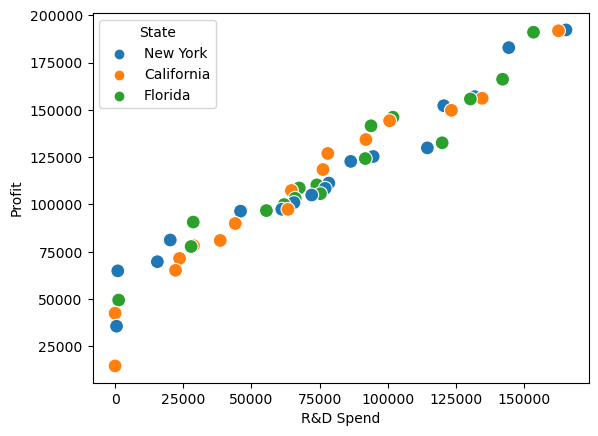

In [11]:
sns.scatterplot(data=df, x='R&D Spend', y ='Profit', hue='State', s=100)

In [12]:
# model preparation

X = df.drop(columns=['Profit'])
y = df['Profit']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=10)

In [15]:
x_train.head()

,R&D Spend,Administration,Marketing Spend,State
27,72107.60,127864.55,353183.81,New York
18,91749.16,114175.79,294919.57,Florida
31,61136.38,152701.92,88218.23,New York
1,162597.70,151377.59,443898.53,California
12,93863.75,127320.38,249839.44,Florida


In [16]:
# column transformer

transformer = ColumnTransformer(transformers=[
    ('first', OneHotEncoder(sparse_output=False), [3])
], remainder='passthrough')

In [17]:
x_train_transformed = transformer.fit_transform(x_train)
x_test_transformed = transformer.transform(x_test)

In [18]:
# linear regression 

lr = LinearRegression()

In [19]:
lr.fit(x_train_transformed, y_train)

LinearRegression()

In [20]:
y_pred = lr.predict(x_test_transformed)

In [21]:
r2_score(y_test, y_pred)

0.9751838503258093